# Processamento do Texto

Esse notebook as funções para fazer o pré-processamento dos textos do diários com foco em extrair uma representação textual dos textos, extração dos termos mais frequentes e análise de similaridade dos textos. 

## Imports Necessários

In [1]:
!pip install spacy
!pip install unidecode
!python -m spacy download pt_core_news_lg
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


     -------------------------------------- 568.2/568.2 MB 4.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [2]:

# Código para poder usar os módulos implementados nesse repositório no notebook 
import sys, os
path_module = os.path.abspath('../modules/')
if path_module not in sys.path:
    sys.path.append(path_module)

# import preprocess.pre_process_text as pp    

In [3]:
# Imports para o projeto
from sklearn.feature_extraction.text import TfidfVectorizer
from preprocess.pre_process_text import PreProcessText
from preprocess.plot_embeddings import PlotEmbeddings

## Processamento do Texto

In [4]:
pe = PlotEmbeddings("pt_core_news_lg")

In [5]:
pp = PreProcessText("pt_core_news_lg")

In [6]:
tokens_teste = pp.process_text("Hoje visitei a velha estação de trem. A estação estava coberta de abandono. Porque, hoje, as pessoas parecem não dar bola para construções velhas como essa da estação de trem. Muitas pessoas só querem saber de coisas futuras. Dão bola só para coisas novas.")

In [7]:
texto_teste1 = ' '.join(tokens_teste)

In [8]:
vetorizador = TfidfVectorizer()
print(texto_teste1)

hoje visitar velho estacao trem estacao coberto abandono hoje pessoa parecer bola construcao velho estacao trem muito pessoa coisa futuro bola coisa


In [9]:
vetor_tfidf = vetorizador.fit_transform([texto_teste1])

In [10]:
indices_palavras_frequentes1 = vetor_tfidf.toarray().argsort()[0][-5:][::-1]
palavras_frequentes1 = [vetorizador.get_feature_names()[i] for i in indices_palavras_frequentes1]

d:\Nitro 5\Downloads\conda\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
print(palavras_frequentes1)

['estacao', 'velho', 'trem', 'pessoa', 'hoje']


## Processamento do Diário Teste

In [12]:
with open("gazettes/2927408_20230704_0.txt") as file_teste:
    texto_teste = file_teste.read().replace("\n", "")

In [13]:
tokens_ = pp.process_text(texto_teste)
print(tokens_)

['salvador', 'bahia', 'terca-feira', 'julho', 'xxxvi', 'oexecutivo', 'financeiros', 'simples', 'governo', 'segov', 'municipal', 'fazenda', 'sefaz', 'municipal', 'tributos', 'municipal', 'gestao', 'semge', 'previdencia', 'dprev', 'gestor', 'organizacoes', 'sociais', 'cogeos', 'municipal', 'educacao', 'smed', 'municipal', 'politicas', 'mulheres', 'infancia', 'juventude', 'spmj', 'municipal', 'desenvolvimento', 'urbano', 'sedur', 'municipal', 'mobilidade', 'semob', 'municipal', 'ordem', 'publica', 'semop', 'civil', 'municipal', 'municipal', 'cultura', 'turismo', 'secult', 'gregorio', 'mattos', 'infraestrutura', 'obras', 'publicas', 'seinfra', 'obras', 'publicas', 'salvador', 'sucop', 'municipal', 'gestao', 'semge', 'municipal', 'educacao', 'smed', 'municipal', 'saude', 'municipal', 'promocao', 'social', 'combate', 'pobreza', 'esportes', 'lazer', 'municipal', 'mobilidade', 'semob', 'transito', 'salvador', 'transalvador', 'municipal', 'ordem', 'publica', 'semop', 'municipal', 'sustentabilid

In [14]:
texto = ' '.join(tokens_)
vetorizador = TfidfVectorizer()

In [15]:
print(texto)

salvador bahia terca-feira julho xxxvi oexecutivo financeiros simples governo segov municipal fazenda sefaz municipal tributos municipal gestao semge previdencia dprev gestor organizacoes sociais cogeos municipal educacao smed municipal politicas mulheres infancia juventude spmj municipal desenvolvimento urbano sedur municipal mobilidade semob municipal ordem publica semop civil municipal municipal cultura turismo secult gregorio mattos infraestrutura obras publicas seinfra obras publicas salvador sucop municipal gestao semge municipal educacao smed municipal saude municipal promocao social combate pobreza esportes lazer municipal mobilidade semob transito salvador transalvador municipal ordem publica semop municipal sustentabilidade resiliencia bem-estar protecao animal secis civil salvador codesal infraestrutura obras publicas seinfra obras publicas salvador sucop governo segov municipal promocao social combate pobreza esportes lazer municipal fazenda sefaz municipal gestao semge mun

In [16]:
vetor_tfidf = vetorizador.fit_transform([texto])

In [17]:
#ordeno os indices do vetor tfidf e pego os 10 maiores, 0 seria a unica linha que tenho, 10 mais relevantes, -1 para inverter a ordem
indices_palavras_frequentes = vetor_tfidf.toarray().argsort()[0][-60:][::-1]
palavras_frequentes = [vetorizador.get_feature_names()[i] for i in indices_palavras_frequentes]

In [18]:
print(palavras_frequentes)

['municipal', 'julho', 'salvador', 'julgamento', 'artigo', 'santos', 'autos', 'inciso', 'processo', 'sedur', 'portaria', 'secretaria', 'previdencia', 'ltda', 'contribuinte', 'iptu', 'cnpj', 'gestao', 'lancamento', 'termo', '2023', 'decreto', 'diretoria', 'trsd', 'legal', 'data', 'livia', 'realizar', 'tecnico', 'servico', 'municipio', 'administrativo', 'kalid', 'resolucao', 'passeio', 'ctrms', 'conforme', '01', 'impugnacao', 'secretario', 'matricula', 'gabinete', 'artigos', 'vigor', 'empreendimentos', 'decisao', 'educacao', 'cumprimento', 'sejul', 'comissao', 'nunes', 'autorizacao', 'servidor', 'manutencao', 'fundamento', 'xavier', 'estabelecer', 'art', 'mensal', 'silva']


d:\Nitro 5\Downloads\conda\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Nitro 5\Downloads\conda\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


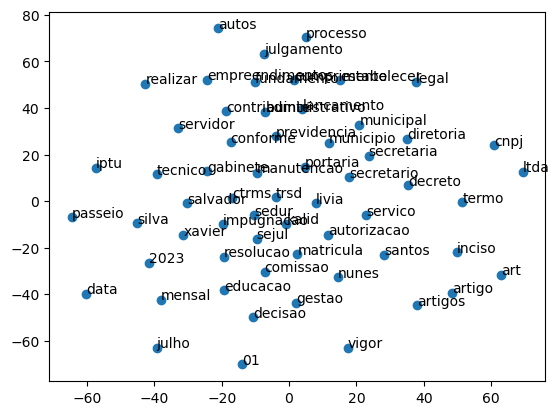

In [19]:
pe.plot_embeddings(palavras_frequentes)